## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Cleaning
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Modelling
from sklearn.preprocessing import StandardScaler   
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from skopt.space import Real, Categorical, Integer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Cleaning

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']

In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Feature Engineering: "Total Score" and "Average"

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['math_score', 'reading_score', 'writing_score', 'total score', 'average']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 4. Exploratory Data Analysis (EDA)
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

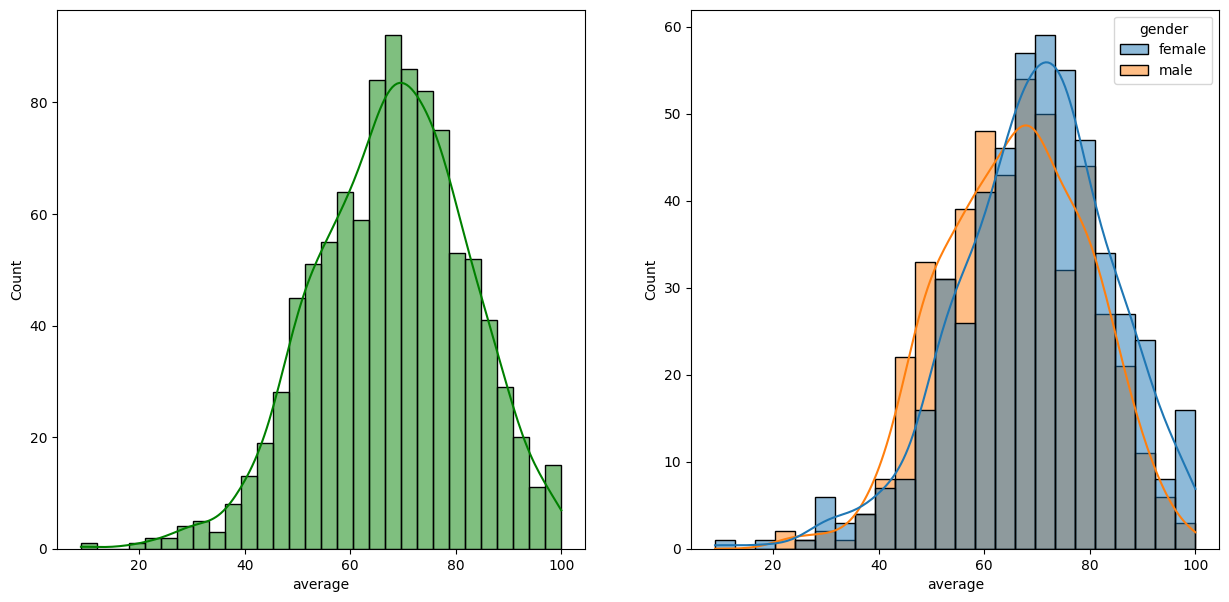

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

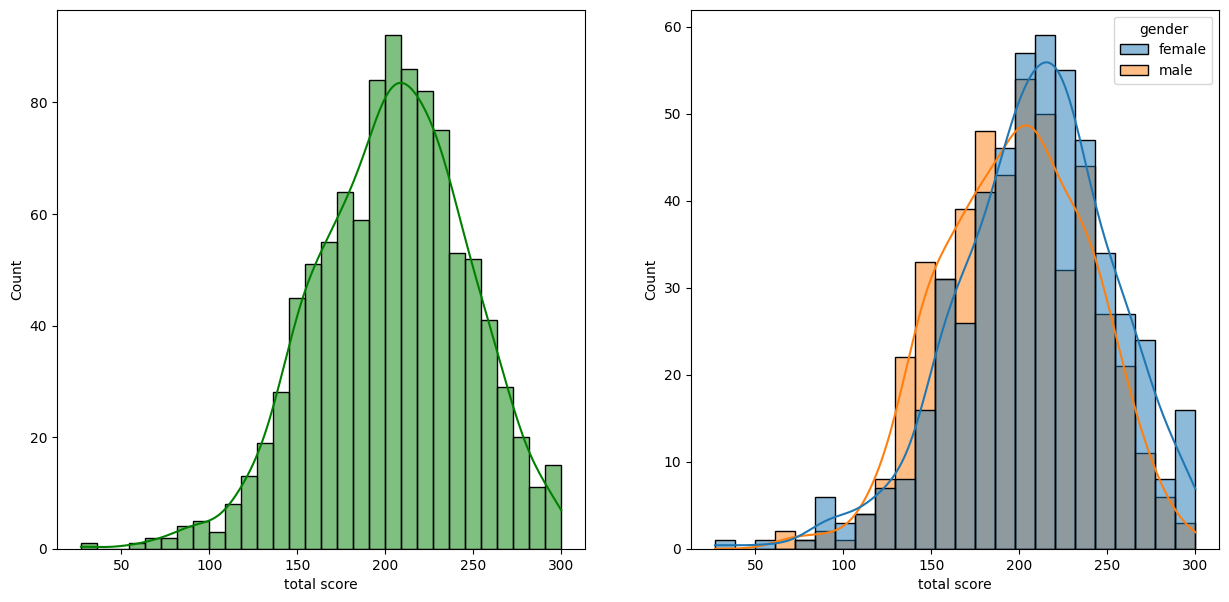

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

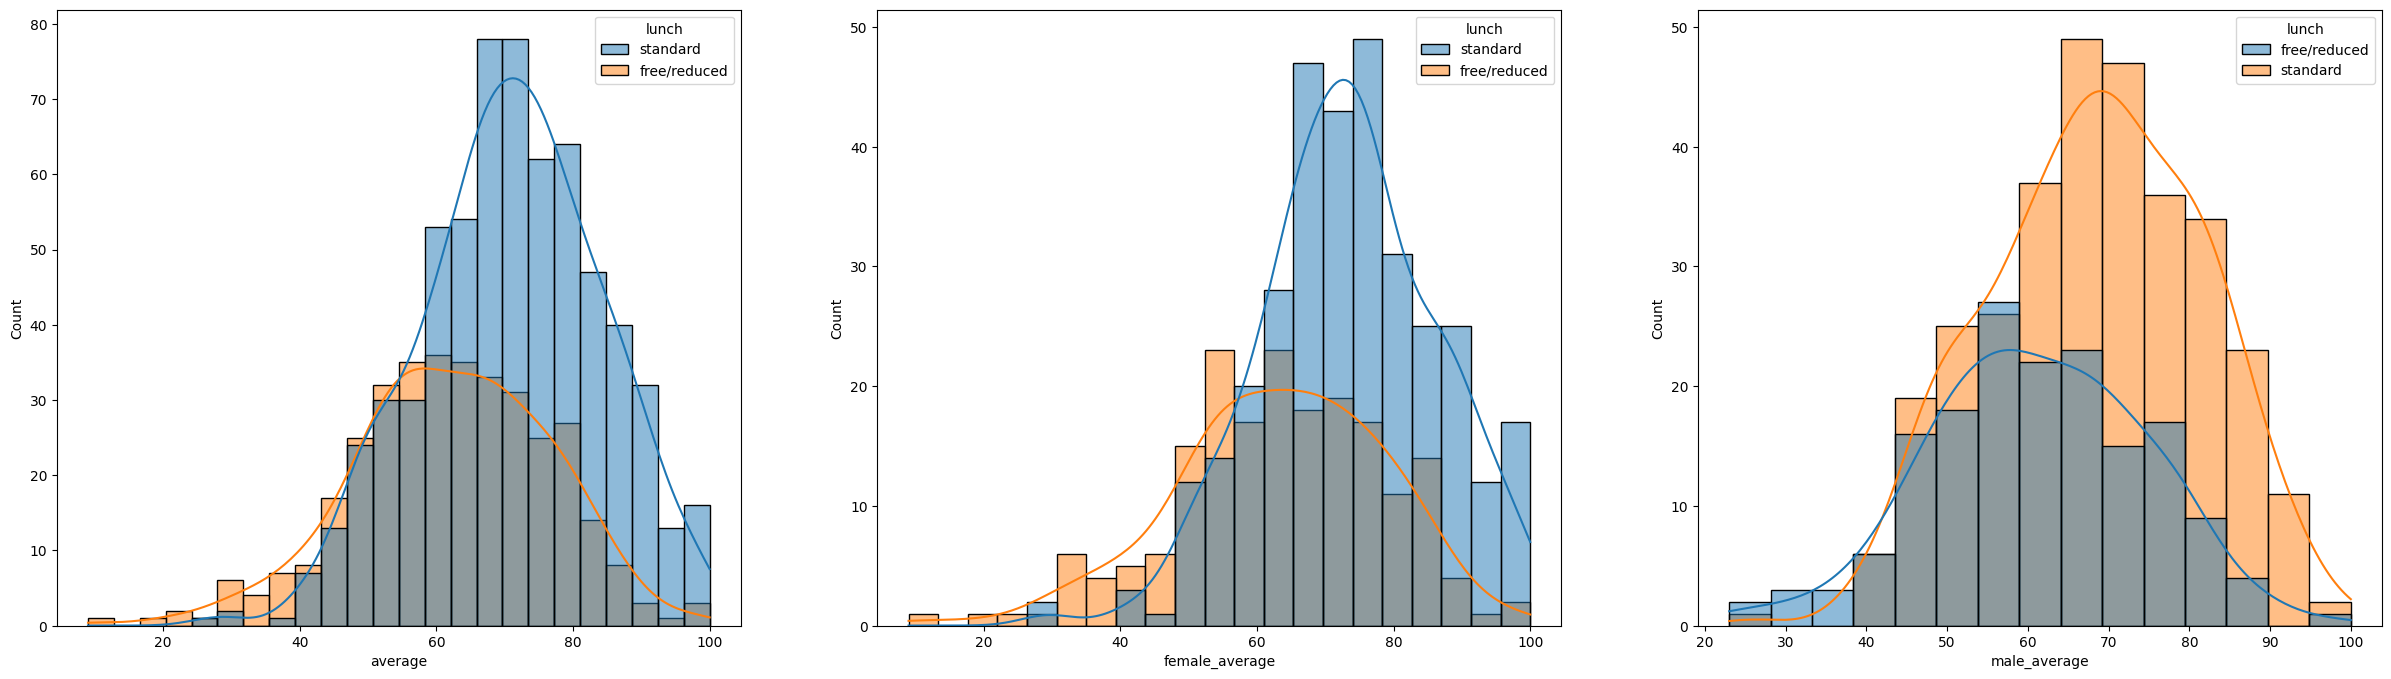

In [20]:
plt.subplots(1,3,figsize=(30,8))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.xlabel("female_average")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.xlabel("male_average")
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

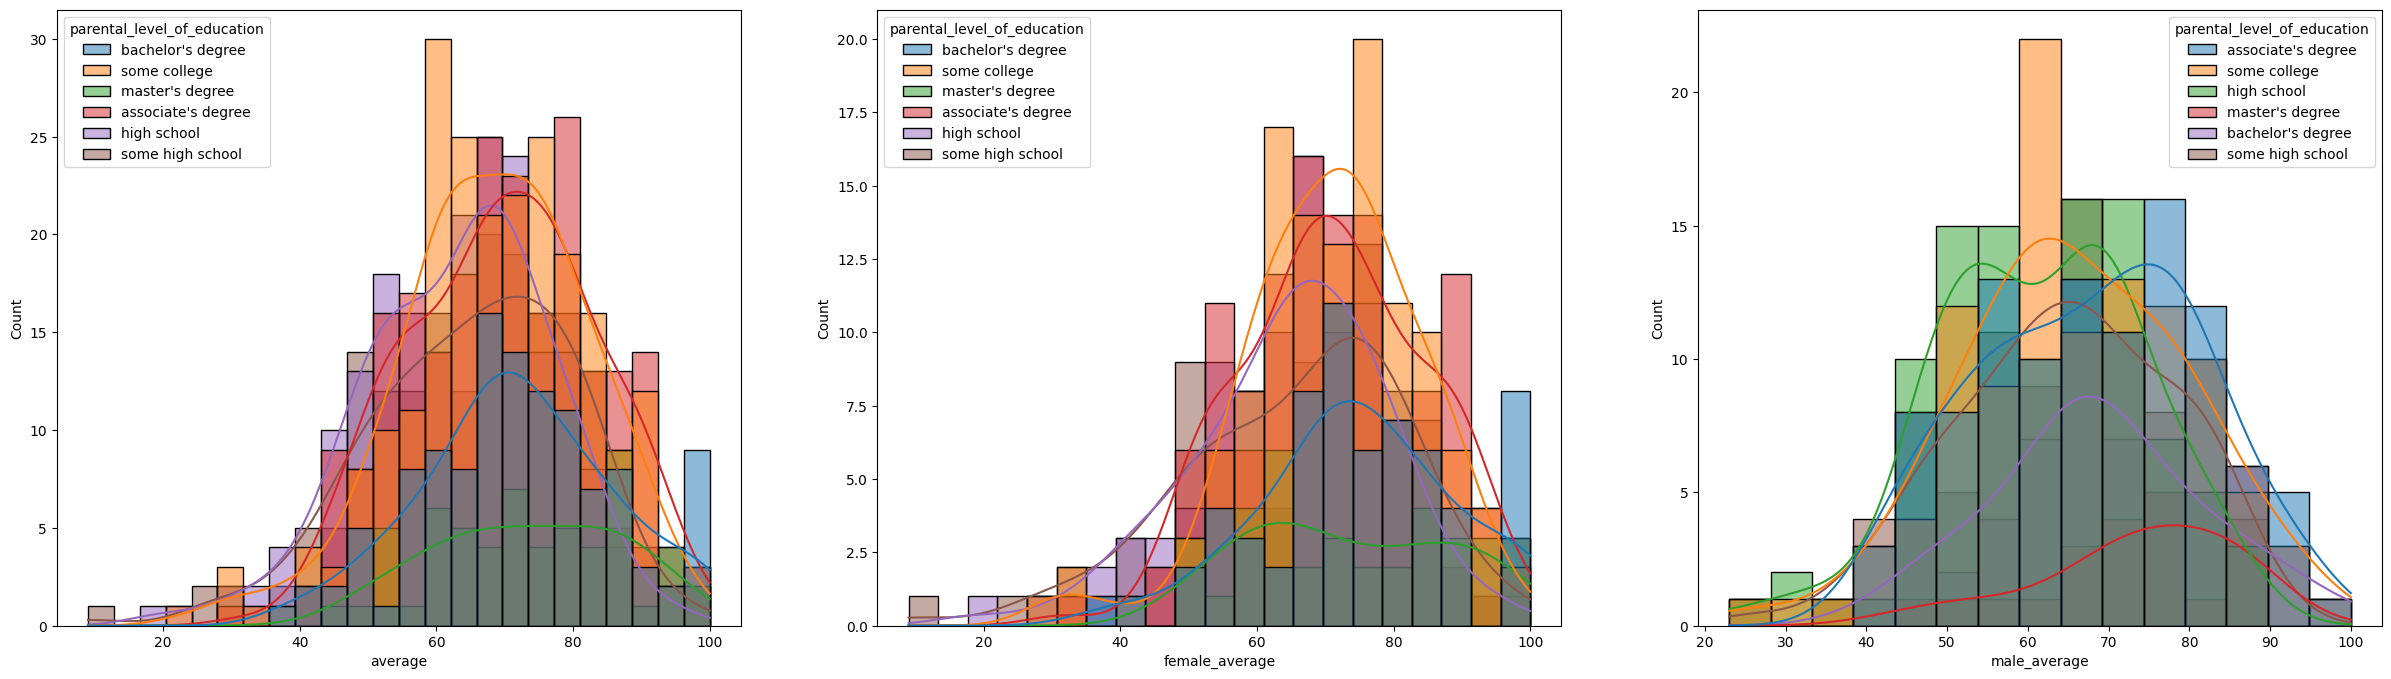

In [21]:
plt.subplots(1,3,figsize=(30,8))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.xlabel("female_average")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.xlabel("male_average")
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

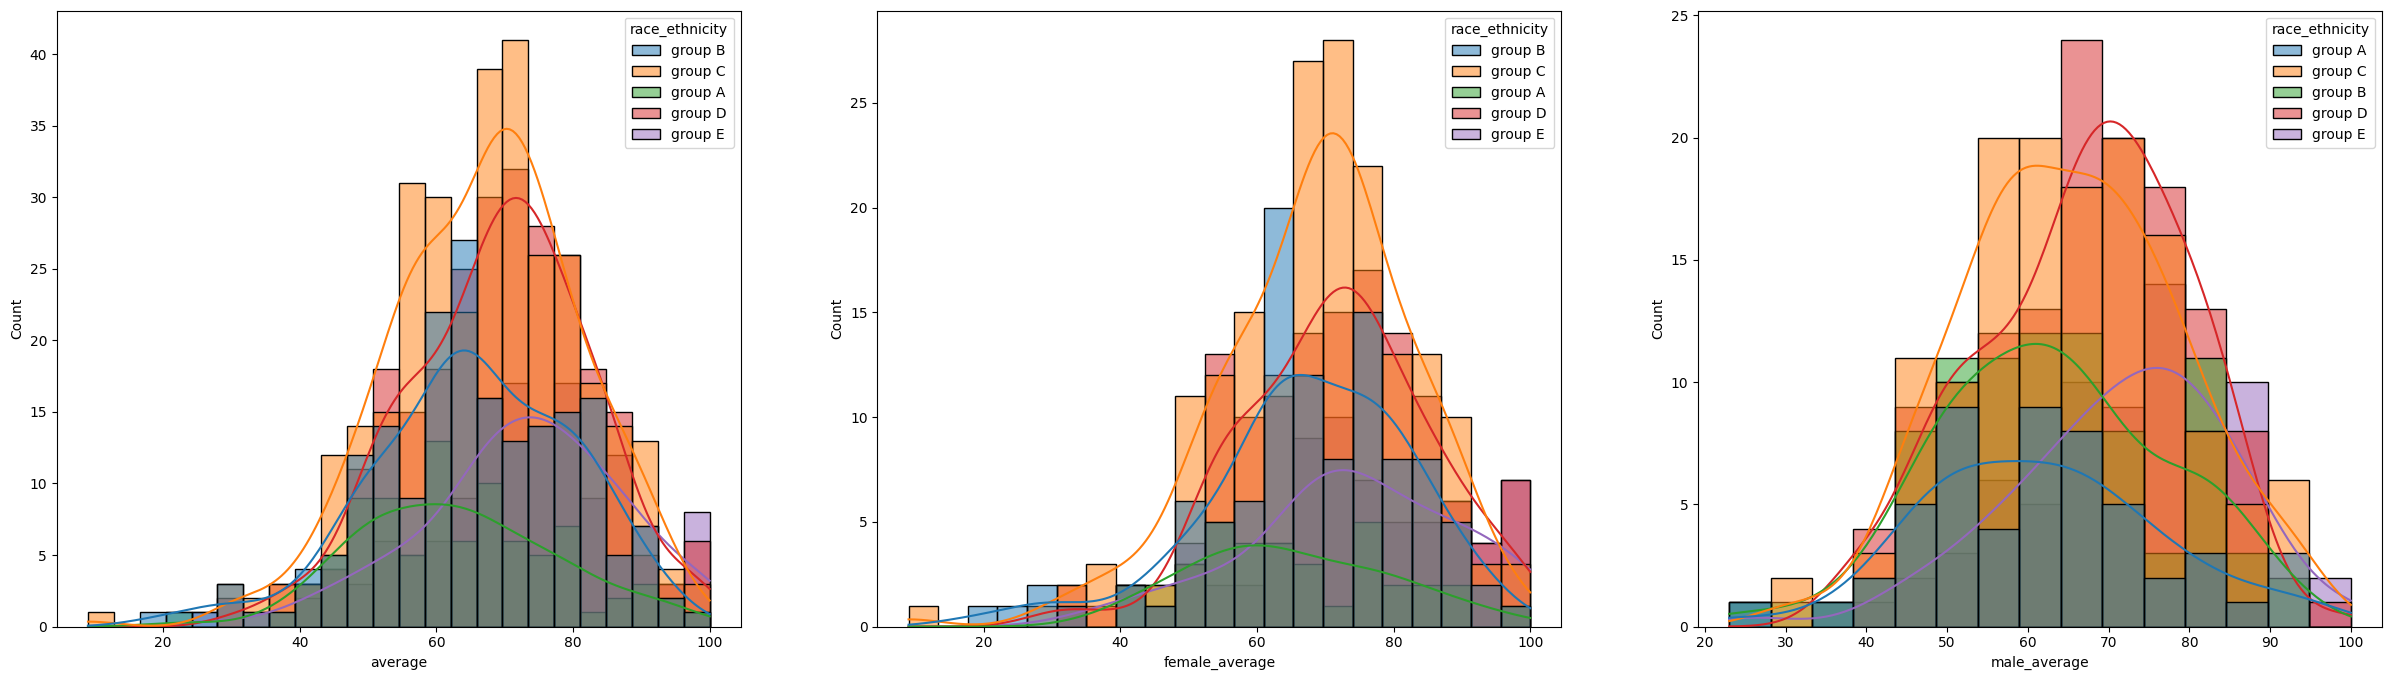

In [22]:
plt.subplots(1,3,figsize=(30,8))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.xlabel("female_average")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.xlabel("male_average")
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

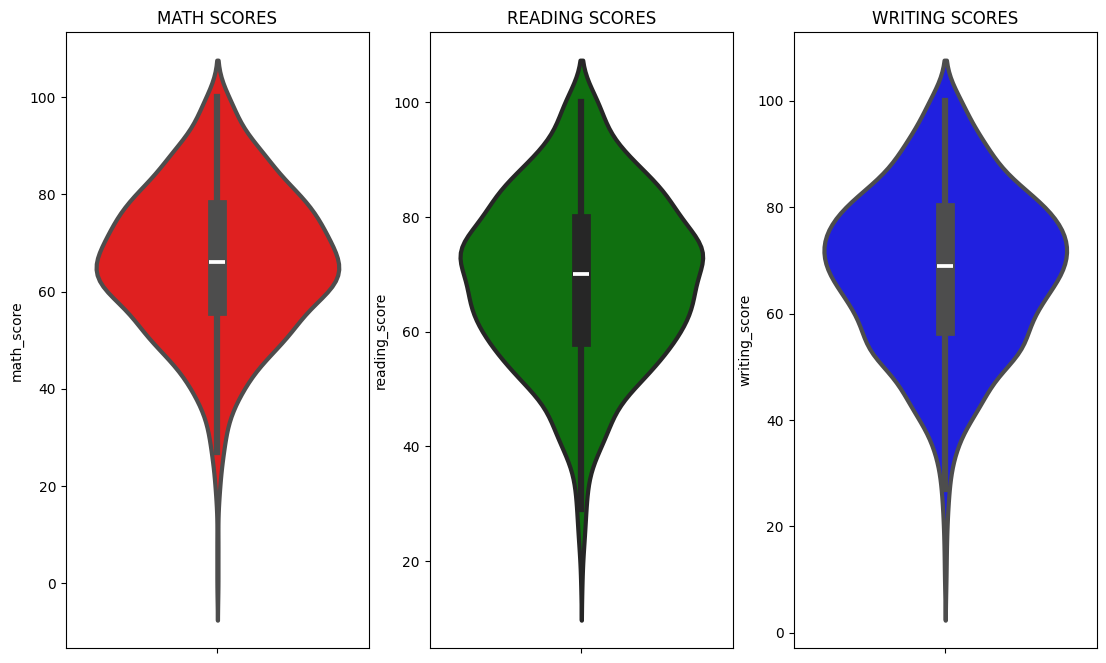

In [23]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

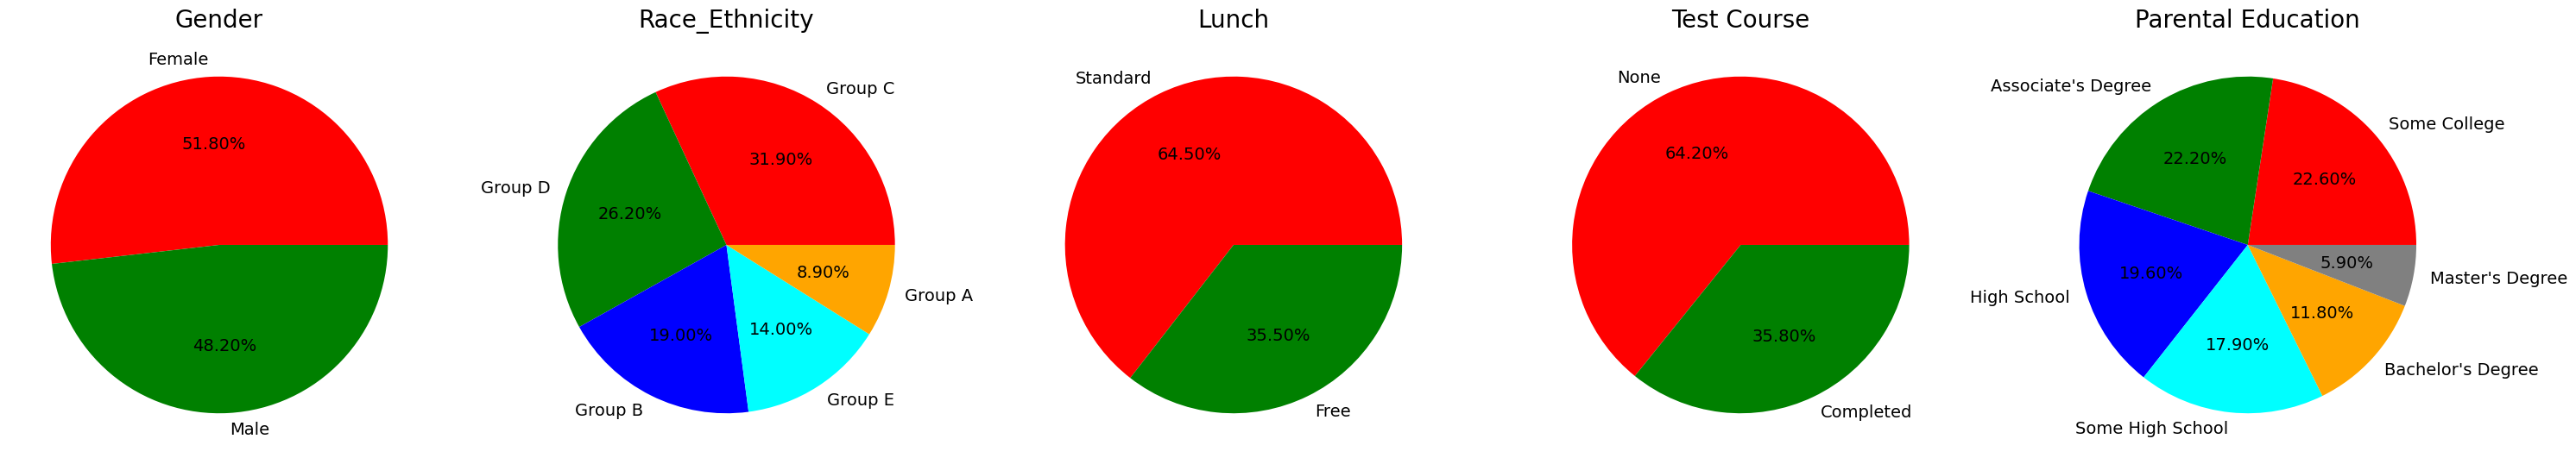

In [24]:
# Set the figure size
plt.rcParams['figure.figsize'] = (30, 9)

# Subplots on the same row
plt.subplot2grid((1, 5), (0, 0), colspan=1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', textprops={'fontsize': 14})
plt.title('Gender', fontsize=20)

plt.subplot2grid((1, 5), (0, 1), colspan=1)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', textprops={'fontsize': 14})
plt.title('Race_Ethnicity', fontsize=20)

plt.subplot2grid((1, 5), (0, 2), colspan=1)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', textprops={'fontsize': 14})
plt.title('Lunch', fontsize=20)

plt.subplot2grid((1, 5), (0, 3), colspan=1)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', textprops={'fontsize': 14})
plt.title('Test Course', fontsize=20)

plt.subplot2grid((1, 5), (0, 4), colspan=1)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', textprops={'fontsize': 14})
plt.title('Parental Education', fontsize=20)

# Adjust layout for better spacing
plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

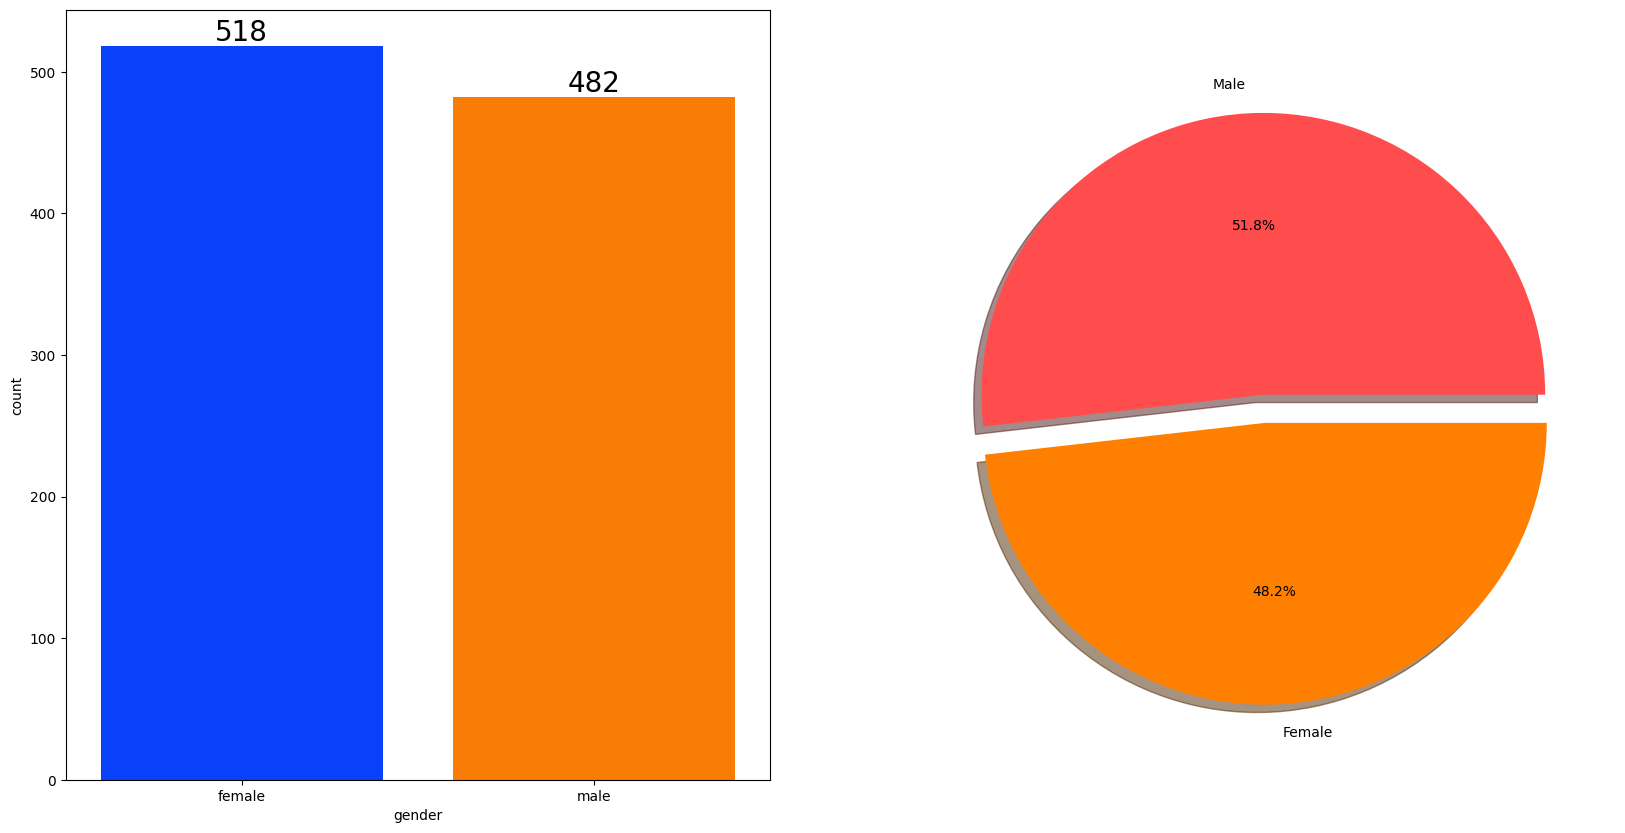

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [26]:
gender_group = df.groupby('gender')[numeric_features].mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


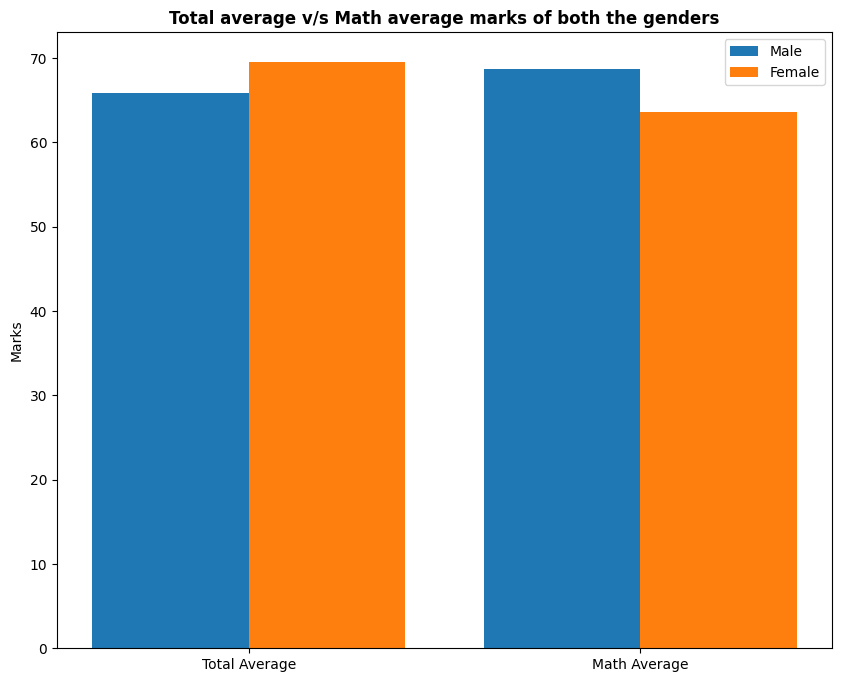

In [27]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

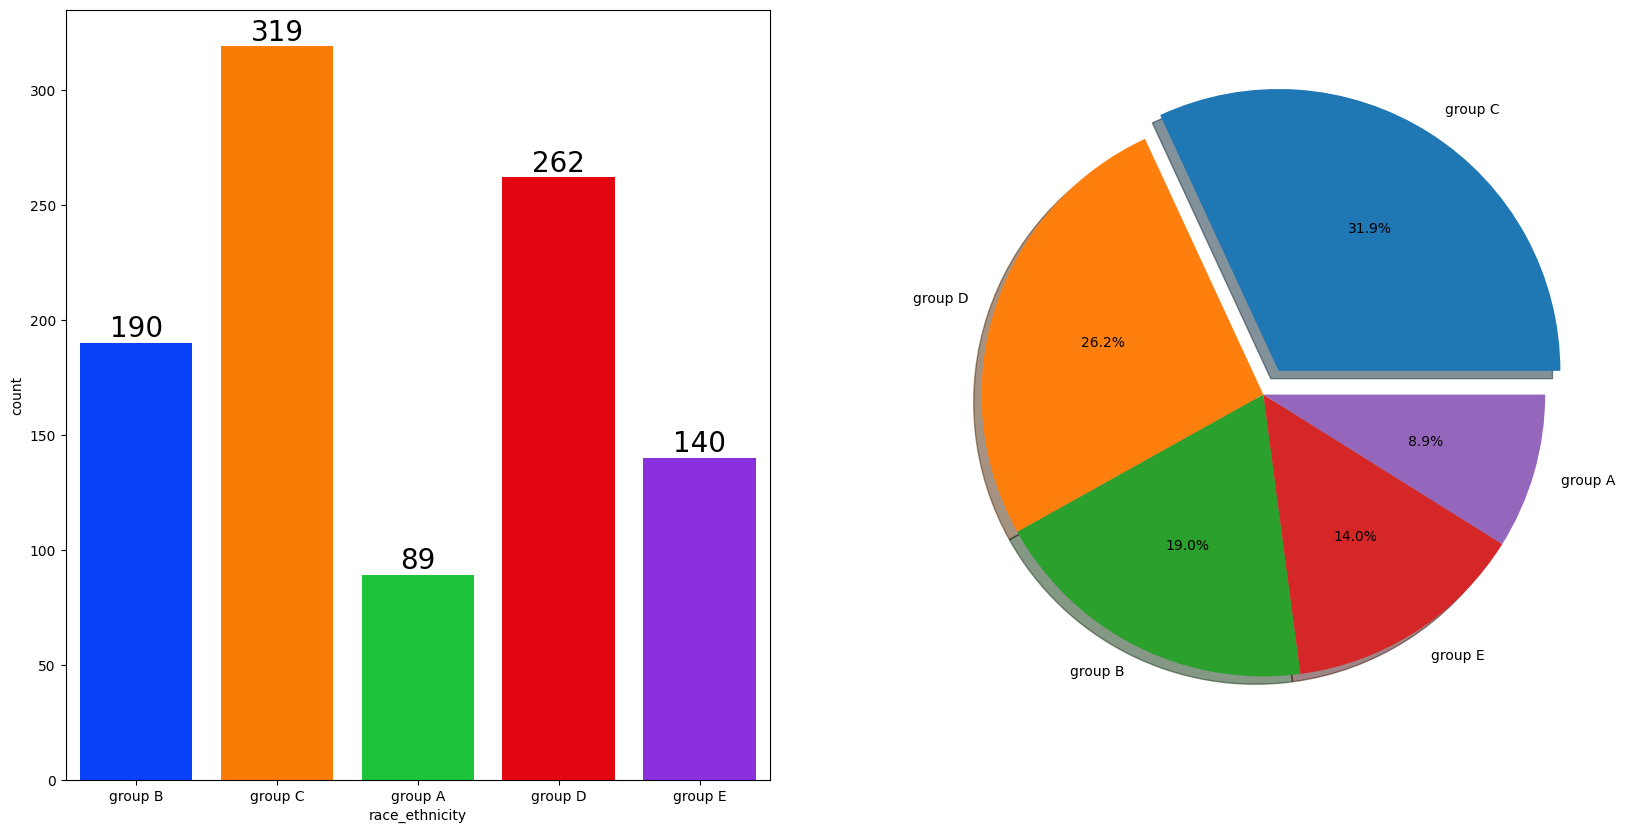

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

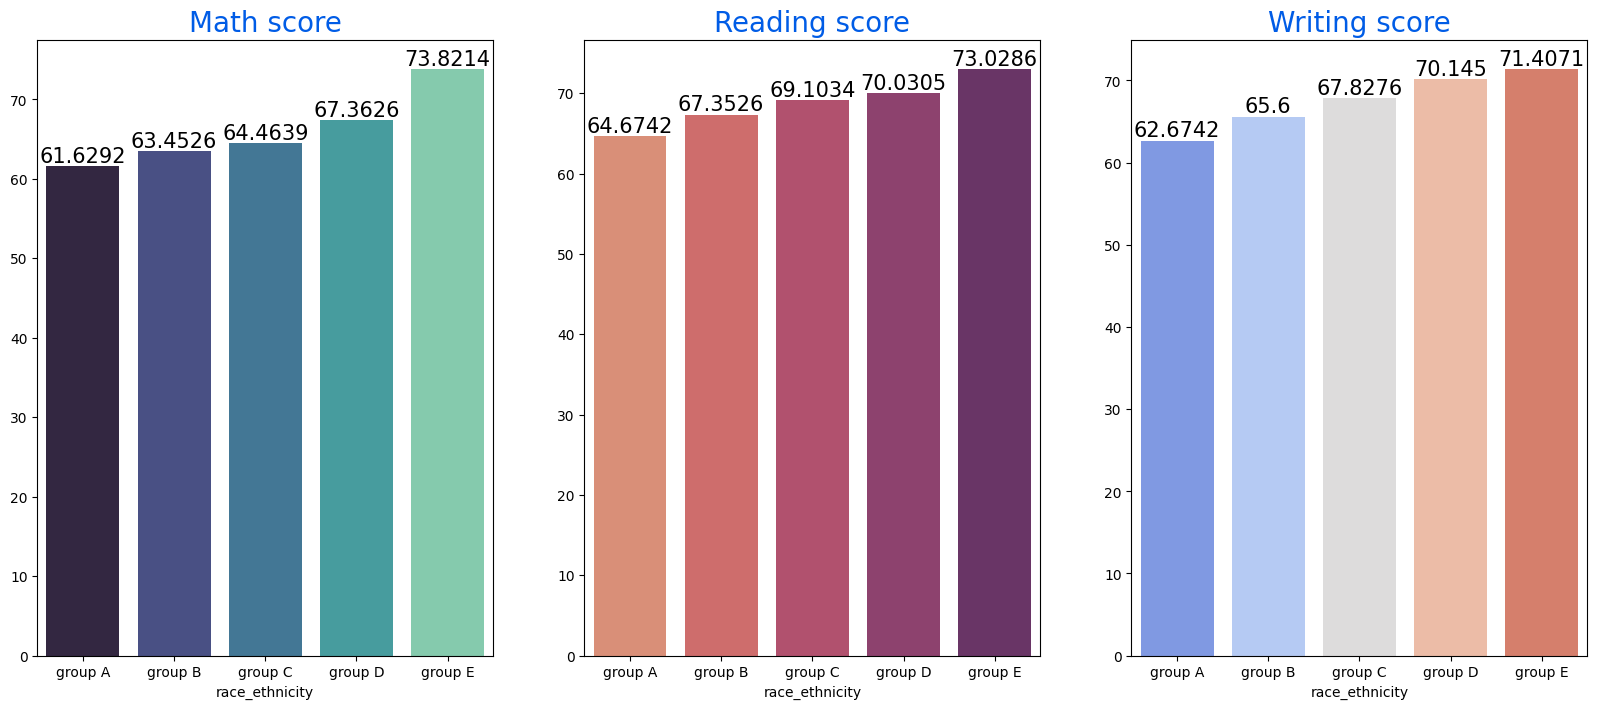

In [29]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

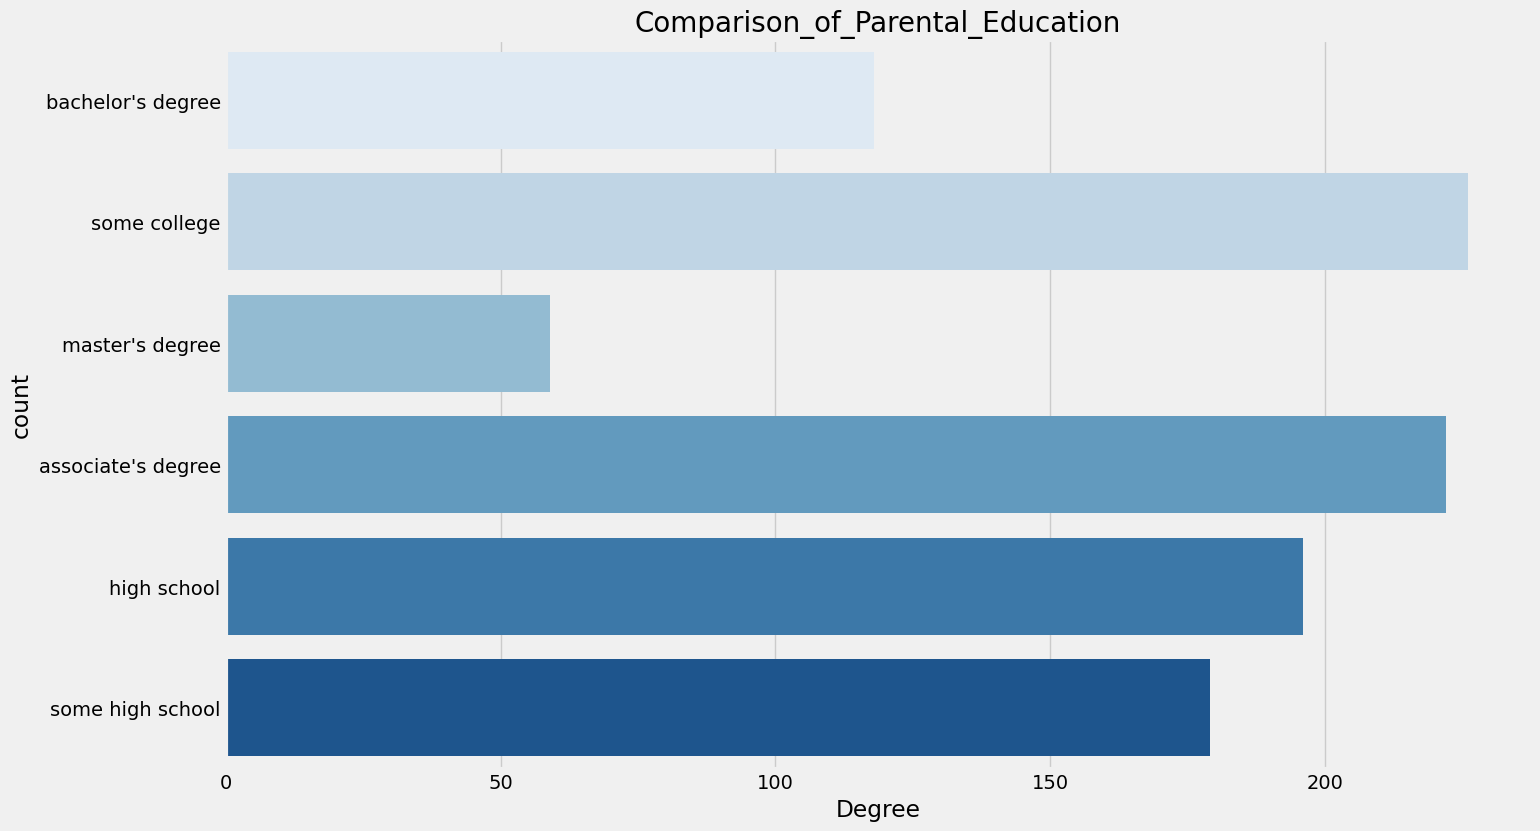

In [30]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison_of_Parental_Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

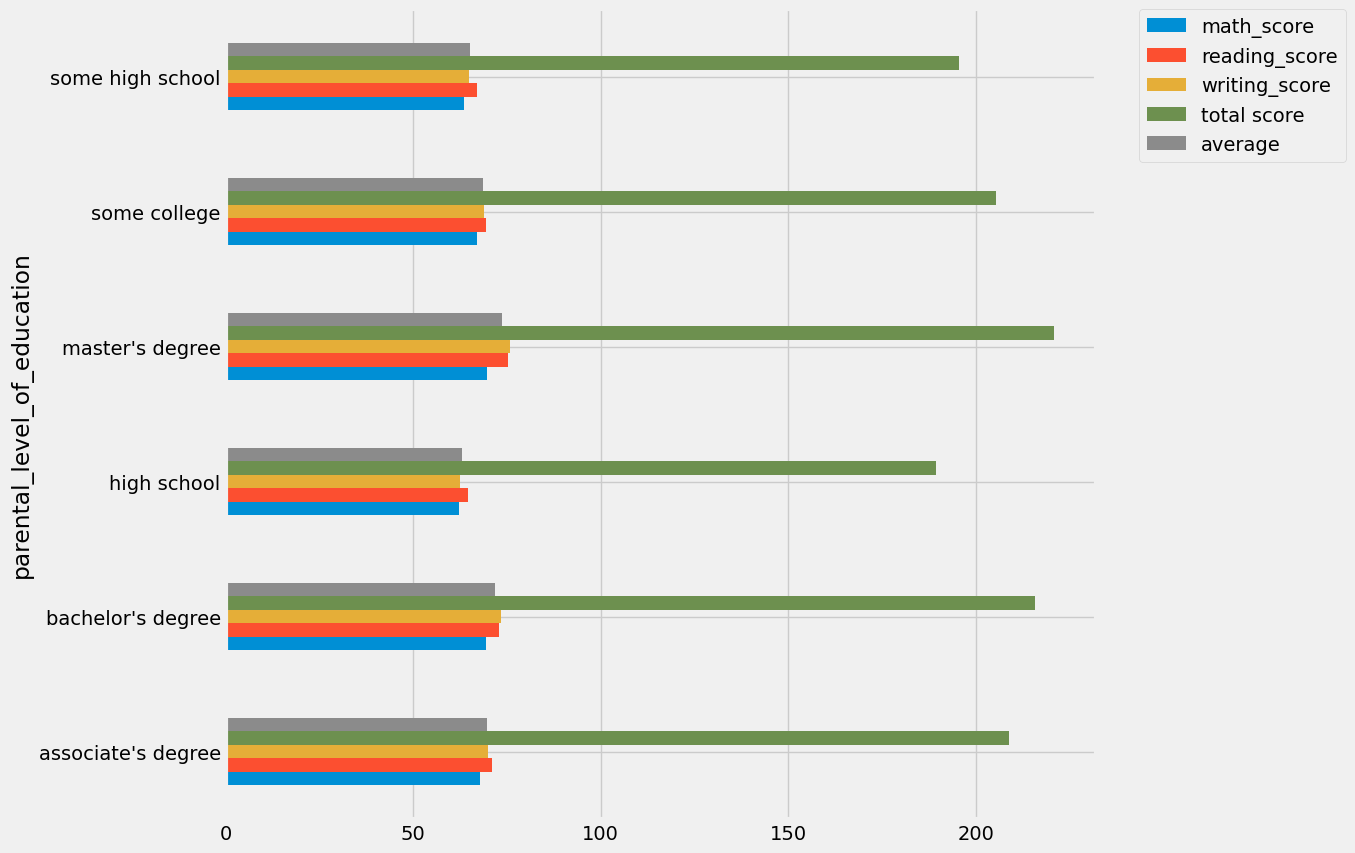

In [31]:
df.groupby('parental_level_of_education')[numeric_features].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

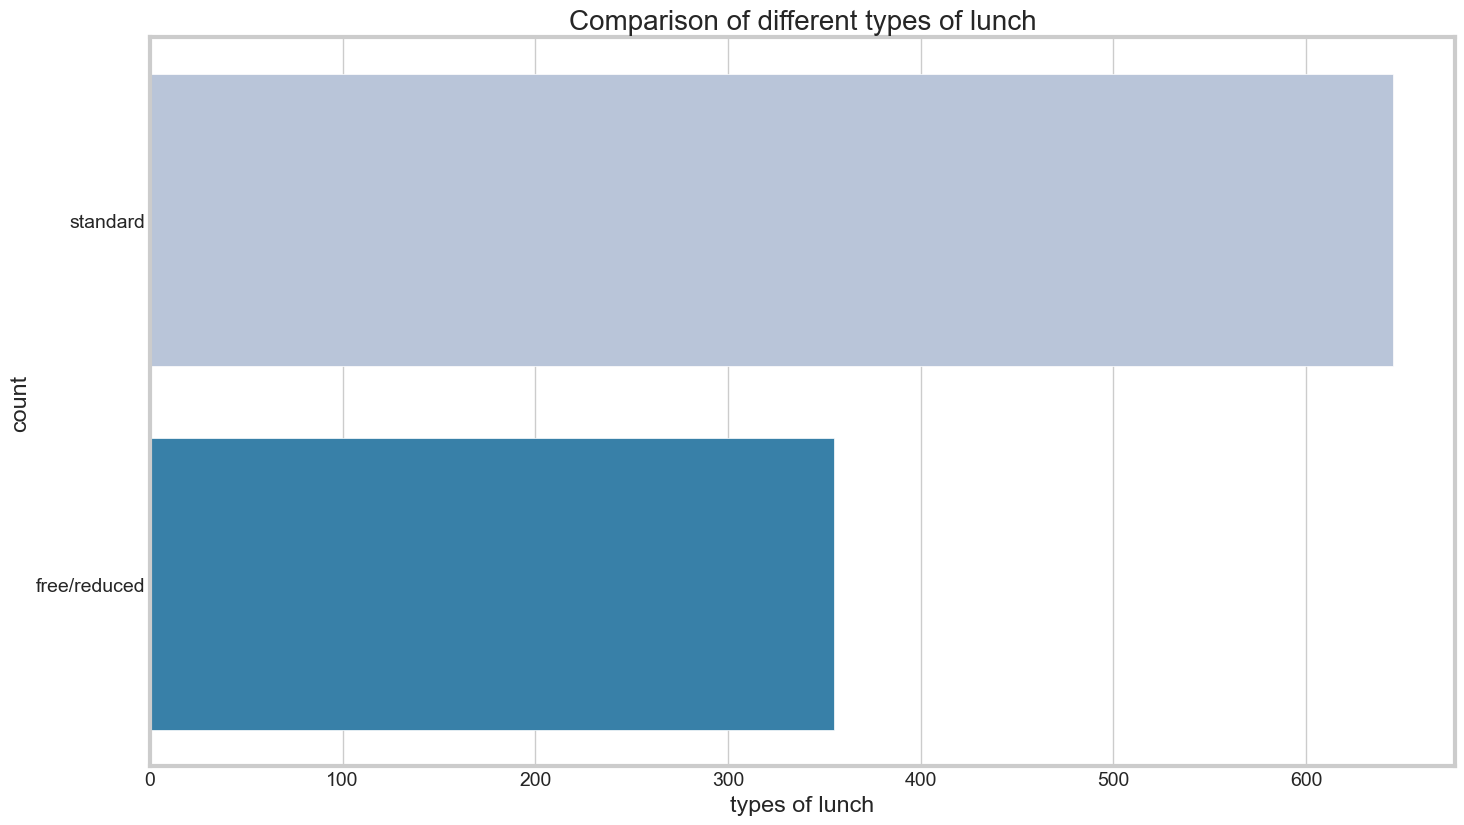

In [32]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_style("whitegrid")
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

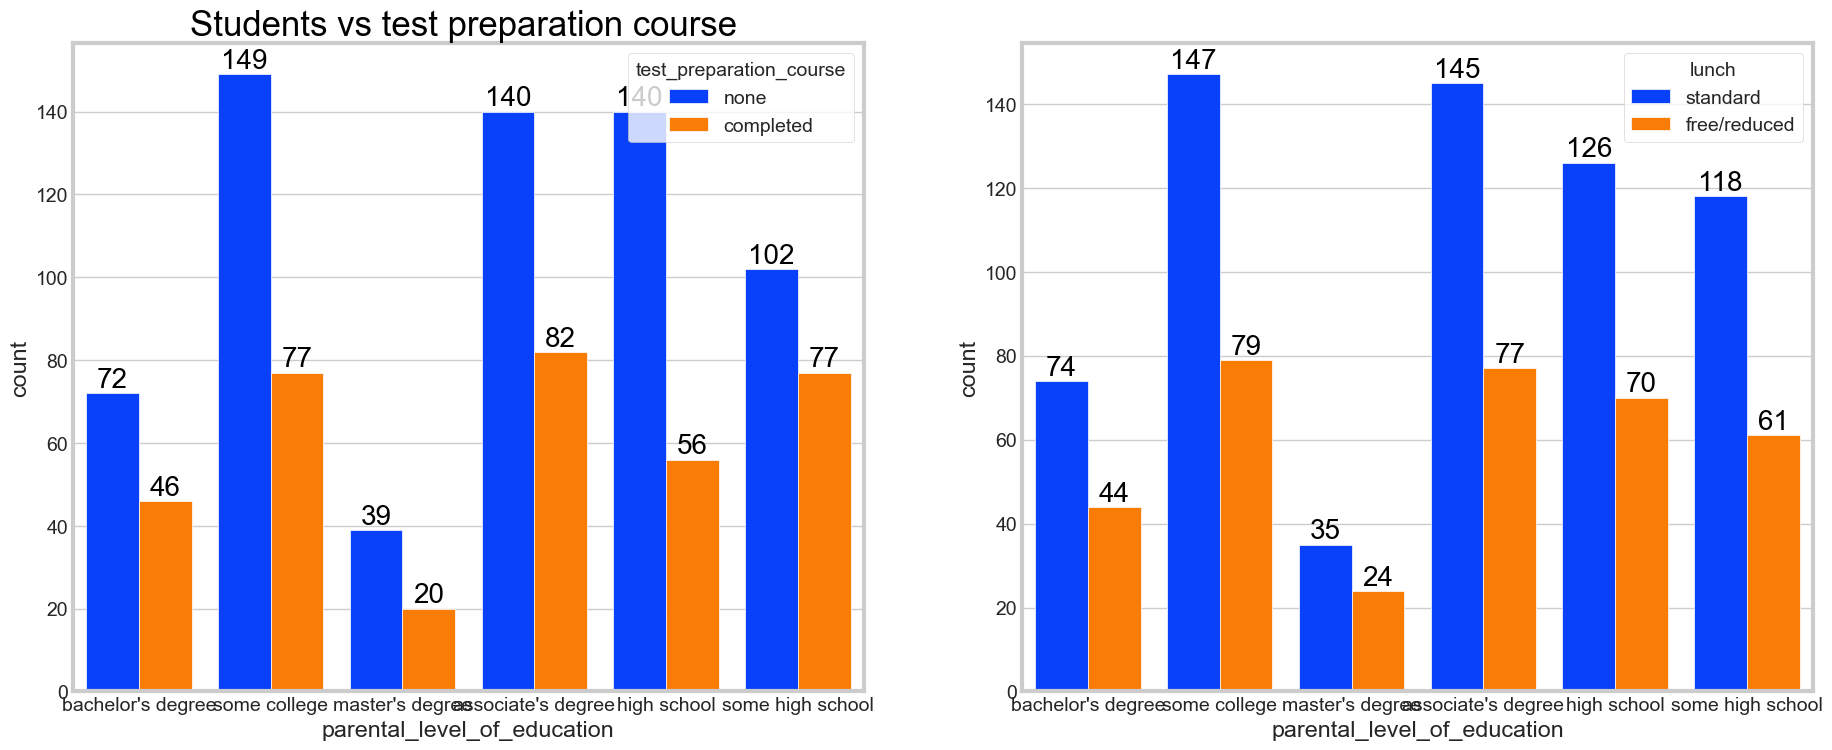

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

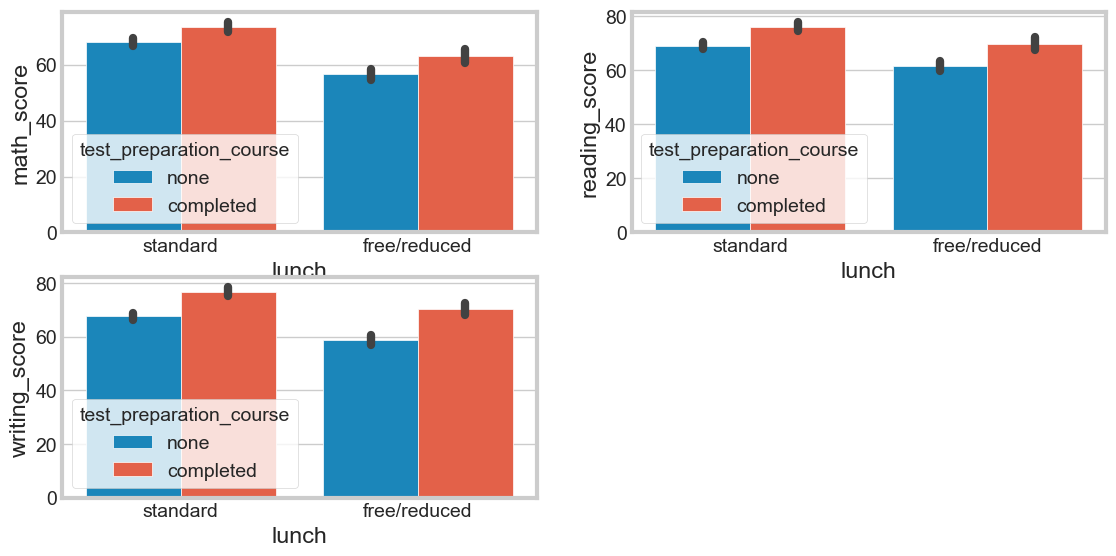

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

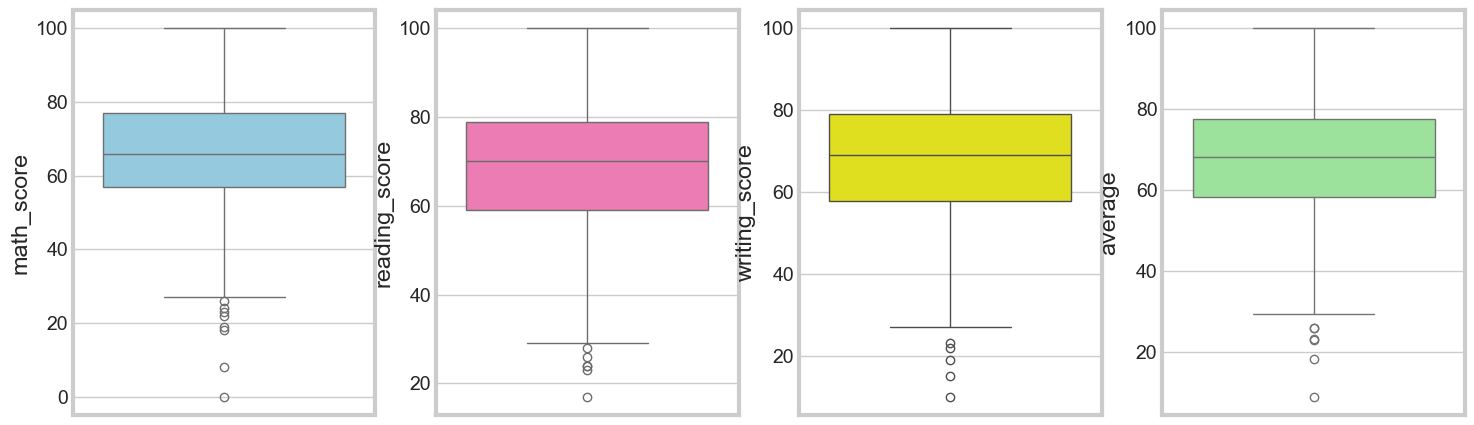

In [35]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

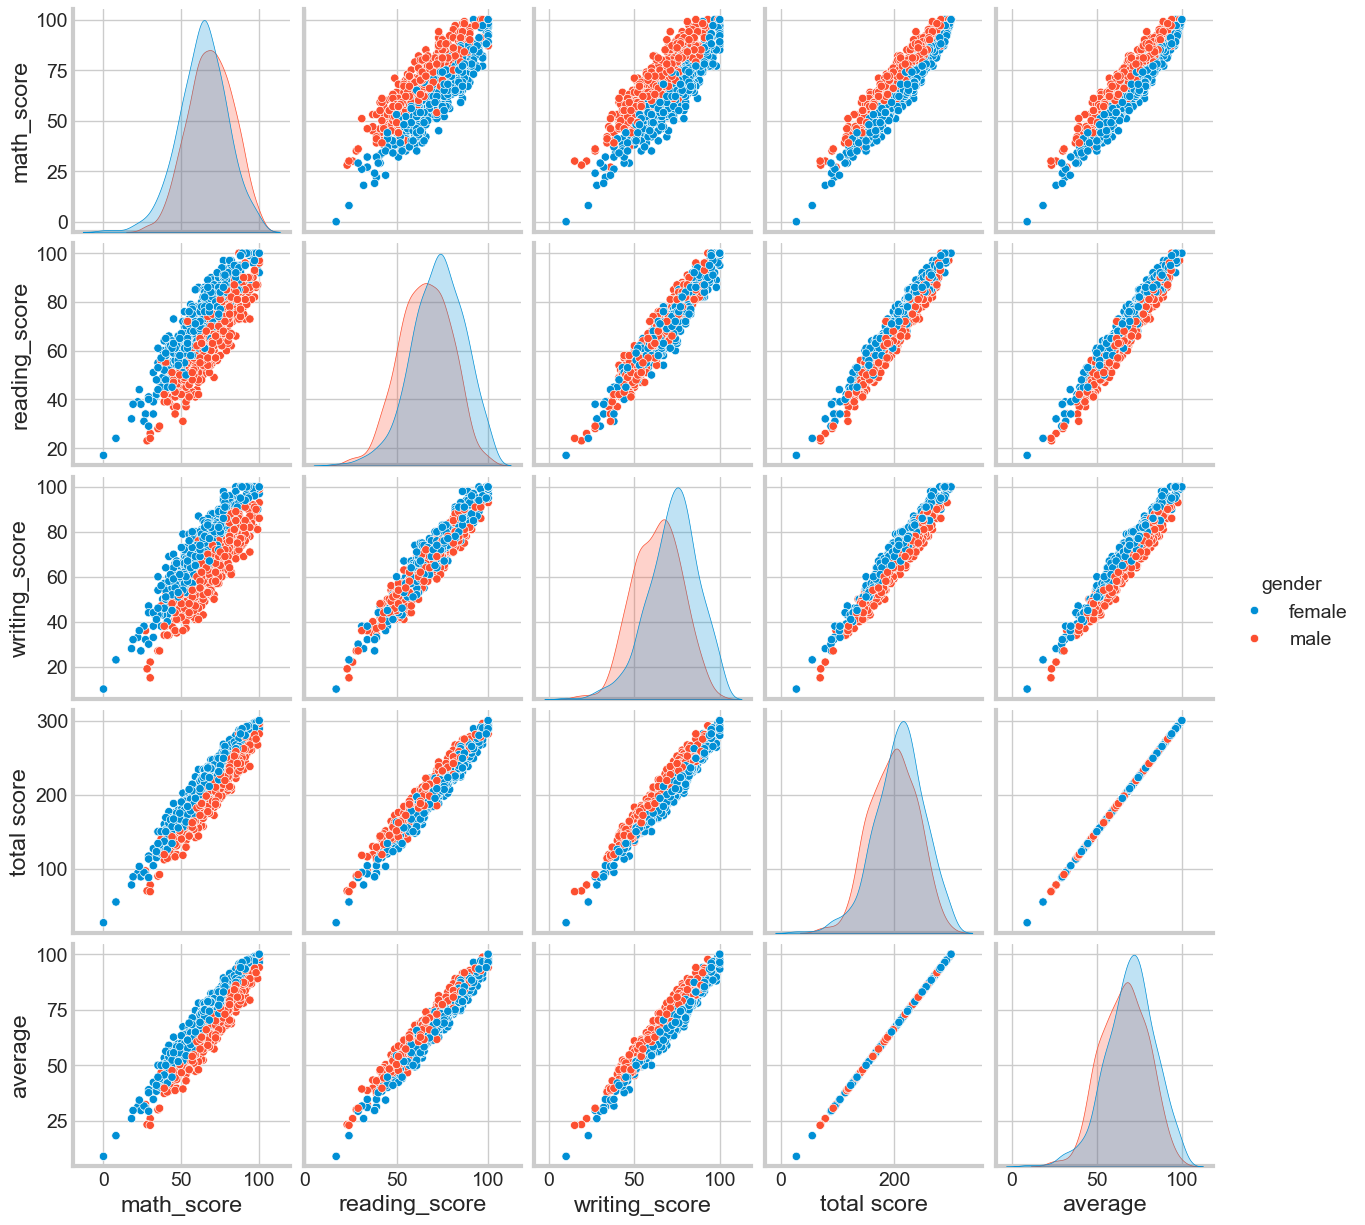

In [36]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

### 5. Model Training:

#### 5.1 Preparing X and Y variables

In [37]:
# math_score will be the Y-variable/predicted column 
x = df.drop(columns=['math_score','writing_score','reading_score'],axis=1)
y = df['math_score']

In [38]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score,average
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [39]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [40]:
x.shape

(1000, 7)

In [41]:
y.shape

(1000,)

#### 5.2 Data Splitting

In [42]:
x_train_ed, x_test_ed, y_train_ed, y_test_ed = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train_ed.to_dict(orient='records')
x_test = x_test_ed.to_dict(orient='records')
y_train = y_train_ed.values
y_test = y_test_ed.values

In [43]:
x_train

[{'gender': 'female',
  'race_ethnicity': 'group D',
  'parental_level_of_education': "master's degree",
  'lunch': 'standard',
  'test_preparation_course': 'none',
  'total score': 207,
  'average': 69.0},
 {'gender': 'female',
  'race_ethnicity': 'group C',
  'parental_level_of_education': "bachelor's degree",
  'lunch': 'free/reduced',
  'test_preparation_course': 'completed',
  'total score': 232,
  'average': 77.33333333333333},
 {'gender': 'female',
  'race_ethnicity': 'group D',
  'parental_level_of_education': 'some college',
  'lunch': 'free/reduced',
  'test_preparation_course': 'none',
  'total score': 254,
  'average': 84.66666666666667},
 {'gender': 'male',
  'race_ethnicity': 'group C',
  'parental_level_of_education': "master's degree",
  'lunch': 'free/reduced',
  'test_preparation_course': 'none',
  'total score': 194,
  'average': 64.66666666666667},
 {'gender': 'male',
  'race_ethnicity': 'group E',
  'parental_level_of_education': 'high school',
  'lunch': 'standard

In [44]:
y_train

array([ 62,  66,  79,  61,  73,  30,  96,  57,  68,  48,  67,  59,  74,
        65,  62,  47,  80,  68,  79,  89,  69,  53,  64,  82,  36,  90,
        64,  52,  67,  51,  79,  63,  52,  40,  40,  63,  46,  65,  62,
        90,  47,  59,  77,  52,  99,  70,  64,  80,  42,  97,  50,  65,
        52,  59,  74,  43,  67, 100,  72,  71,  55,  84,  63,  63,  42,
        78,  69,  80,  79,  87,  65,  51,  85,  47,  54,  38,  59,  60,
        49,  52,  44,  70,  84,  76,  35,  96,  80,  81,  57,  94,  82,
        70,  94,  75,  52,  77,  70,  65,  40,  70,  79,  67,  68,  47,
        72,  57,  83,  61,  98,  61,  92,  68,  77,  66,  47,  65,  68,
        63,  73,  42,  62,  68,  67,  49,  35,  68,  69,  70,  80,  75,
        63,  66,  74,  44,  72,  77,  46,  72,  82,  62,  80,  54,  79,
        87,  65,  82,  40,  93,  65,  77,  46,  88,  32,  39,  86,  53,
        81,  41,  61,  88,  59,  81,  58,  64,  81,  70,  62,  77,  62,
        87,  67,  62,  76,  63,  88,  72,  55,  61,  50,  87,  5

#### 5.3 Pipeline for Model Selection, Hyperparameter Tuning, Feature Scaling, Categorical to Numerical feature transformation

In [45]:
pipeline = Pipeline([
    ('dv', DictVectorizer(sparse=False)),     # for one hot encoding
    ('scaler', StandardScaler()),   # to scale the data 
    ('regressor', 'passthrough')  # Placeholder for the model
])

param_grid = [
    {
        'regressor': [LinearRegression()],
        'regressor__fit_intercept': Categorical([True, False]),
    },
    {
        'regressor': [SVR()],
        'regressor__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'regressor__kernel': Categorical(['linear', 'poly', 'rbf']),
        'regressor__gamma': Real(1e-6, 1e+1, prior='log-uniform') if 'rbf' in ['linear', 'poly', 'rbf'] else None,
        'regressor__degree': Integer(1, 5) if 'poly' in ['linear', 'poly', 'rbf'] else None,
    },
    {
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': Integer(1, 10, dtype=int),
        'regressor__weights': Categorical(['uniform', 'distance']),
    },
    {
        'regressor': [AdaBoostRegressor()],
        'regressor__n_estimators': Integer(10, 200, dtype=int),
        'regressor__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    },
    {
        'regressor': [DecisionTreeRegressor()],
        'regressor__min_samples_split': Integer(2, 10, dtype=int),
        'regressor__max_depth': Integer(1, 10, dtype=int),
    },
    {
        'regressor': [XGBRegressor()], 
        'regressor__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
        'regressor__n_estimators': Integer(10, 200, dtype=int),
        'regressor__max_depth': Integer(1, 10, dtype=int),
        'regressor__subsample': Real(0.1, 1.0, prior='uniform'),
        'regressor__colsample_bytree': Real(0.1, 1.0, prior='uniform'),
    },
   # {
   #     'regressor': [CatBoostRegressor()], 
   #     'regressor__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    #    'regressor__n_estimators': Integer(10, 200),
   #     'regressor__max_depth': Integer(1, 10),
   # },'''
    {
        'regressor': [RandomForestRegressor()],  # Random Forest model
        'regressor__n_estimators': Integer(10, 200, dtype=int),
        'regressor__max_depth': Integer(1, 10, dtype=int),
        'regressor__min_samples_split':  Integer(2, 10, dtype=int),
    }
]

param_grid = [
    {
        'regressor': [LinearRegression()], 
        'regressor__fit_intercept': [True, False],
    },
    {
        'regressor': [SVR()],  # SVR model
        'regressor__C': [1e-6, 1e+6, 'log-uniform'],
        'regressor__kernel': ['linear', 'poly', 'rbf'],
        'regressor__gamma': [1e-6, 1e+1, 'log-uniform'] if 'rbf' in ['linear', 'poly', 'rbf'] else None,
        'regressor__degree': [1, 3, 5] if 'poly' in ['linear', 'poly', 'rbf'] else None,
    },
    {
        'regressor': [KNeighborsRegressor()],  # kNR model
        'regressor__n_neighbors': [1, 5, 10],
        'regressor__weights': ['uniform', 'distance'],
    },
    {
        'regressor': [AdaBoostRegressor()], 
        'regressor__n_estimators': [10,50,100,150],
        'regressor__learning_rate': [0.01, 1.0, 'log-uniform'], 
    },   
    {
        'regressor': [DecisionTreeRegressor()],  # Decision Tree model
        'regressor__min_samples_split': [2,5,10],
        'regressor__max_depth': [1, 5, 10],
        
    },
    {
        'regressor': [XGBRegressor()], 
        'regressor__learning_rate': [0.01, 1.0,'log-uniform'],
        'regressor__n_estimators': [10,50,100,150],
        'regressor__max_depth': [1, 5, 10],
        'regressor__subsample': [0.1, 1.0,'uniform'],
        'regressor__colsample_bytree': [0.1, 1.0],
    },
    {
        'regressor': [RandomForestRegressor()],  # Random Forest model
        'regressor__n_estimators': [10,50,100,150],
        'regressor__max_depth': [1, 5, 10],
        'regressor__min_samples_split': [2,5,10],
    }
]

In [46]:
param_grid = [
    {
        'regressor': [LinearRegression()], 
        'regressor__fit_intercept': Categorical([True, False]),
    },
    {
        'regressor': [SVR()],  # SVR model
        'regressor__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'regressor__kernel': Categorical(['linear', 'poly', 'rbf']),
        'regressor__gamma': Real(1e-6, 1e+1, prior='log-uniform') if 'rbf' in ['linear', 'poly', 'rbf'] else None,
        'regressor__degree': Integer(1, 5) if 'poly' in ['linear', 'poly', 'rbf'] else None,
    },
    {
        'regressor': [KNeighborsRegressor()],  # kNR model
        'regressor__n_neighbors': Integer(1, 10),
        'regressor__weights': Categorical(['uniform', 'distance']),
    },
    {
        'regressor': [AdaBoostRegressor()], 
        'regressor__n_estimators': Integer(10, 200),
        'regressor__learning_rate': Real(0.01, 1.0, prior='log-uniform'), 
    },   
    {
        'regressor': [DecisionTreeRegressor()],  # Decision Tree model
        'regressor__min_samples_split': Integer(2, 10),
        'regressor__max_depth': Integer(1, 10),
        
    },
    {
        'regressor': [XGBRegressor()], 
        'regressor__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
        'regressor__n_estimators': Integer(10, 200),
        'regressor__max_depth': Integer(1, 10),
        'regressor__subsample': Real(0.1, 1.0, prior='uniform'),
        'regressor__colsample_bytree': Real(0.1, 1.0, prior='uniform'),
    },
    {
        'regressor': [CatBoostRegressor()], 
        'regressor__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
        'regressor__n_estimators': Integer(10, 200),
        'regressor__max_depth': Integer(1, 10),
    },
    {
        'regressor': [RandomForestRegressor()],  # Random Forest model
        'regressor__n_estimators': Integer(10, 200),
        'regressor__max_depth': Integer(1, 10),
        'regressor__min_samples_split':  Integer(2, 10),
    }
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
opt = RandomizedSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
opt.fit(x_train, y_train)

In [ ]:
print('Best Model:', opt.best_estimator_)
print('highest score',  opt.best_score_)
print('Best Hyperparameters:', opt.best_params_)

Best Model: Pipeline(steps=[('dv', DictVectorizer(sparse=False)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])
highest score -13.666957258468765
Best Hyperparameters: {'regressor': LinearRegression(), 'regressor__fit_intercept': True}


In [ ]:
result_df = pd.DataFrame(opt.cv_results_)

In [ ]:
pd.options.display.max_colwidth = 200
pd.set_option('display.max_rows', None)
columns = ['params','mean_test_score','rank_test_score']  # to display the result of GridSearchCV: all the model corresponding it hyperparameters, test score and its ranking
result_df[columns]

,params,mean_test_score,rank_test_score
0,"{'regressor': SVR(), 'regressor__C': [0.29567188615449136], 'regressor__degree': [3], 'regressor__gamma': [2.007056637655808], 'regressor__kernel': 'rbf'}",NaN,2
1,"{'regressor': KNeighborsRegressor(), 'regressor__n_neighbors': [7], 'regressor__weights': 'uniform'}",NaN,2
2,"{'regressor': RandomForestRegressor(), 'regressor__max_depth': [7], 'regressor__min_samples_split': [7], 'regressor__n_estimators': [151]}",NaN,2
3,"{'regressor': LinearRegression(), 'regressor__fit_intercept': True}",-13.666957,1
4,"{'regressor': DecisionTreeRegressor(), 'regressor__max_depth': [8], 'regressor__min_samples_split': [3]}",NaN,2
5,"{'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stoppin...",NaN,2
6,"{'regressor': KNeighborsRegressor(), 'regressor__n_neighbors': [3], 'regressor__weights': 'distance'}",NaN,2
7,"{'regressor': AdaBoostRegressor(), 'regressor__learning_rate': [0.8733243295523859], 'regressor__n_estimators': [81]}",NaN,2
8,"{'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stoppin...",NaN,2
9,"{'regressor': SVR(), 'regressor__C': [19.4244737427557], 'regressor__degree': [3], 'regressor__gamma': [1.908566460027458e-05], 'regressor__kernel': 'linear'}",NaN,2


In [ ]:
best_model = opt.best_estimator_
best_params = opt.best_params_
best_score = opt.best_score_

#### 5.4 Model Evaluation

In [ ]:
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square, mse

In [ ]:
model_train_mae , model_train_rmse, model_train_r2, model_train_mse = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2, model_test_mse = evaluate_model(y_test, y_test_pred)

In [ ]:
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))
print("- Mean Squared Error: {:.4f}".format(model_train_mse))

print('----------------------------------')
    
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))
print("- Mean Squared Error: {:.4f}".format(model_test_mse))

Model performance for Training set
- Root Mean Squared Error: 3.6252
- Mean Absolute Error: 2.8984
- R2 Score: 0.9417
- Mean Squared Error: 13.1420
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.5927
- Mean Absolute Error: 2.8200
- R2 Score: 0.9470
- Mean Squared Error: 12.9073


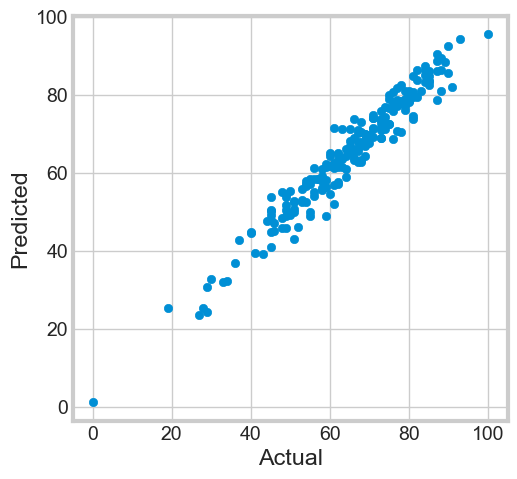

In [ ]:
# Set the figure size
plt.figure(figsize=(5, 5))

plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

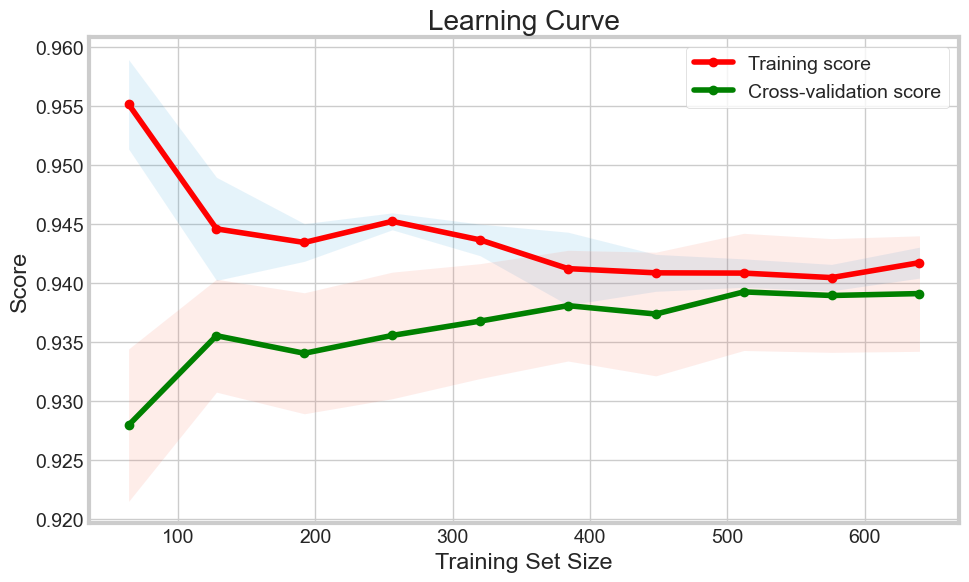

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
0,91,81.961685,9.038315
1,53,55.927505,-2.927505
2,80,78.167374,1.832626
3,74,76.869278,-2.869278
4,84,87.368179,-3.368179


#### 5.5 Model Saving

In [ ]:
import pickle
output_file = 'model.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump(best_model, f_out)

print(f'The model is saved to {output_file}')

The model is saved to model.bin


#### 6. Testing

In [ ]:
math_score = x_test[4]

In [79]:
math_score

{'gender': 'male',
 'race_ethnicity': 'group E',
 'parental_level_of_education': 'some college',
 'lunch': 'standard',
 'test_preparation_course': 'completed',
 'total score': 245,
 'average': 81.66666666666667}

In [80]:
test = best_model.predict([math_score])[0]

In [81]:
test

87.36647032077525

In [83]:
y_test[4]

84